# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: Model depth vs. breadth
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [1]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Import and organize the data

In [2]:
# import dataset
import pandas as pd
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# convert from pandas dataframe to tensor
data = torch.tensor( iris[iris.columns[0:4]].values ).float()

# transform species to number
labels = torch.zeros(len(data), dtype=torch.long)
# labels[iris.species=='setosa'] = 0 # don't need!
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

# Construct and sanity-check the model

In [3]:
# create a class for the model

class ANNiris(nn.Module):
  def __init__(self,nUnits,nLayers):
    super().__init__()

    # create dictionary to store the layers
    self.layers = nn.ModuleDict()
    self.nLayers = nUnits#nLayers#

    ### input layer
    self.layers['input'] = nn.Linear(4,nUnits)

    ### hidden layers
    for i in range(nLayers):
      self.layers[f'hidden{i}'] = nn.Linear(nUnits,nUnits)

    ### output layer
    self.layers['output'] = nn.Linear(nUnits,3)


  # forward pass
  def forward(self,x):
    # input layer (note: the code in the video omits the relu after this layer)
    x = F.relu( self.layers['input'](x) )

    # hidden layers
    for i in range(self.nLayers):
      x = F.relu( self.layers[f'hidden{i}'](x) )

    # return output layer
    x = self.layers['output'](x)
    return x

In [14]:
# generate an instance of the model and inspect it
nUnitsPerLayer = 12
nLayers = 4
net = ANNiris(nUnitsPerLayer,nLayers)
net

ANNiris(
  (layers): ModuleDict(
    (input): Linear(in_features=4, out_features=12, bias=True)
    (hidden0): Linear(in_features=12, out_features=12, bias=True)
    (hidden1): Linear(in_features=12, out_features=12, bias=True)
    (hidden2): Linear(in_features=12, out_features=12, bias=True)
    (hidden3): Linear(in_features=12, out_features=12, bias=True)
    (output): Linear(in_features=12, out_features=3, bias=True)
  )
)

In [9]:
# A quick test of running some numbers through the model.
# This simply ensures that the architecture is internally consistent.


# 10 samples, 4 dimensions
tmpx = torch.randn(10,4)

# run it through the DL
y = net(tmpx)

# exam the shape of the output
print( y.shape ), print(' ')

# and the output itself
print(y)

KeyError: 'hidden4'

# Create a function that trains the model

In [12]:
# a function to train the model

def trainTheModel(theModel):

  # define the loss function and optimizer
  lossfun = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(theModel.parameters(),lr=.01)

  # loop over epochs
  for epochi in range(numepochs):

    # forward pass
    yHat = theModel(data)

    # compute loss
    loss = lossfun(yHat,labels)

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



  # final forward pass to get accuracy
  predictions = theModel(data)
  predlabels = torch.argmax(predictions, axis=1)
  acc = 100*torch.mean((predlabels == labels).float())

  # total number of trainable parameters in the model
  nParams = sum(p.numel() for p in theModel.parameters() if p.requires_grad)

  # function outputs
  return acc,nParams

In [15]:
# test the function once

numepochs = 2500
acc = trainTheModel(net)

# check the outputs
acc # tuple containing (accuracy,nparams)

KeyError: 'hidden4'

# Now for the experiment!

In [16]:
# this cell takes ~2 mins

# define the model parameters
numlayers = range(1,6)         # number of hidden layers
numunits  = np.arange(4,101,3) # units per hidden layer

# initialize output matrices
accuracies  = np.zeros((len(numunits),len(numlayers)))
totalparams = np.zeros((len(numunits),len(numlayers)))

# number of training epochs
numepochs = 500


# start the experiment!
for unitidx in range(len(numunits)):
  for layeridx in range(len(numlayers)):

    # create a fresh model instance
    net = ANNiris(numunits[unitidx],numlayers[layeridx])

    # run the model and store the results
    acc,nParams = trainTheModel(net)
    accuracies[unitidx,layeridx] = acc

    # store the total number of parameters in the model
    totalparams[unitidx,layeridx] = nParams


KeyError: 'hidden1'

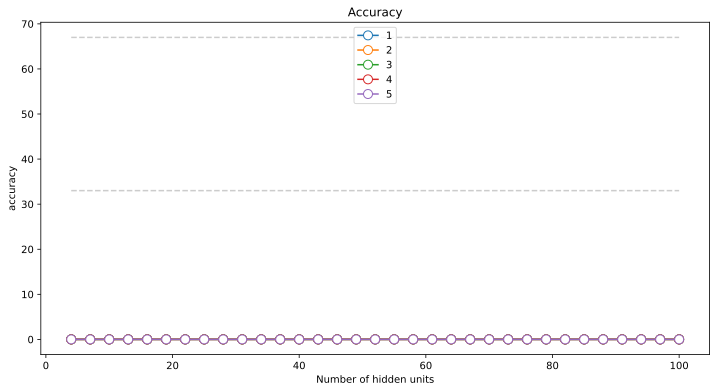

In [17]:
# show accuracy as a function of model depth
fig,ax = plt.subplots(1,figsize=(12,6))

ax.plot(numunits,accuracies,'o-',markerfacecolor='w',markersize=9)
ax.plot(numunits[[0,-1]],[33,33],'--',color=[.8,.8,.8])
ax.plot(numunits[[0,-1]],[67,67],'--',color=[.8,.8,.8])
ax.legend(numlayers)
ax.set_ylabel('accuracy')
ax.set_xlabel('Number of hidden units')
ax.set_title('Accuracy')
plt.show()

/home/joeyv/miniconda3/envs/pytorch/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


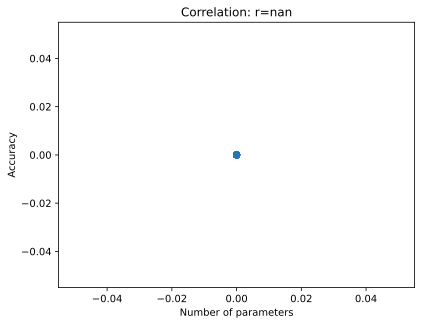

In [18]:
# Maybe it's simply a matter of more parameters -> better performance?

# vectorize for convenience
x = totalparams.flatten()
y = accuracies.flatten()

# correlation between them
r = np.corrcoef(x,y)[0,1]

# scatter plot
plt.plot(x,y,'o')
plt.xlabel('Number of parameters')
plt.ylabel('Accuracy')
plt.title('Correlation: r=' + str(np.round(r,3)))
plt.show()

# Additional explorations

In [ ]:
# 1) Try it again with 1000 training epochs. Do the deeper models eventually learn?
#
# 2) The categories are coded a "0", "1", and "2". Is there something special about those numbers?
#    Recode the labels to be, e.g., 5, 10, and 17. Or perhaps -2, 0, and 2. Is the model still able to learn?
#